In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [22]:
def read_numbers_from_txt(file_path):
    """
    讀取一個 txt 檔案，每行一個數值，回傳 list。
    """
    numbers = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:  # 避免空行
                numbers.append(int(line) / 1000)  # 可改成 int(line) 若確定都是整數
    return np.array(numbers)
def plot_cumulative_counts(data_dict):
    """
    畫出每個類別的數量累加圖（累積總和）。
    data_dict: dict，key 是類別名稱，value 是數值 list。
    """
    plt.figure(figsize=(10, 6))
    
    for label, values in data_dict.items():
        cumulative_sum = []
        total = 0
        for v in values:
            total += v
            cumulative_sum.append(total)
        plt.plot(range(1, len(values)+1), cumulative_sum, label=label, linewidth=1.5, marker='o', markersize=1)

    plt.xlabel('N operation')
    plt.ylabel('times(ms)')
    plt.title('Time complexity of alloc and free')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [23]:
free_list = read_numbers_from_txt("free_list.txt")
malloc = read_numbers_from_txt("malloc.txt")

In [24]:
perf = {
    "free_list": free_list,
    "malloc": malloc
}

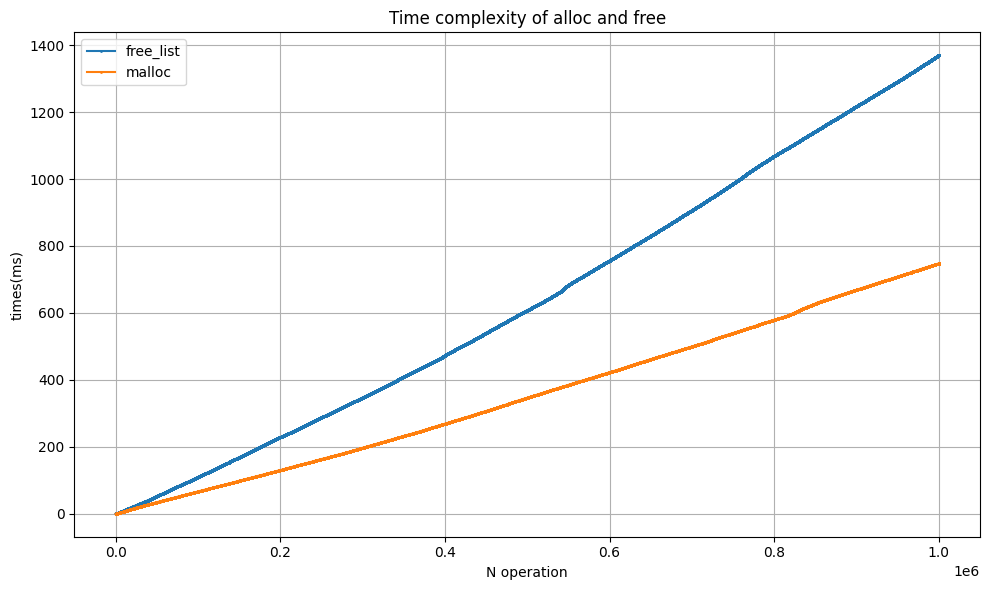

In [25]:
plot_cumulative_counts(perf)